In [1]:
from qiskit import *

In [174]:
qc = QuantumCircuit()
a = QuantumRegister(3, "a")
b = QuantumRegister(8, "b")
qc.add_register(a)
qc.add_register(b)

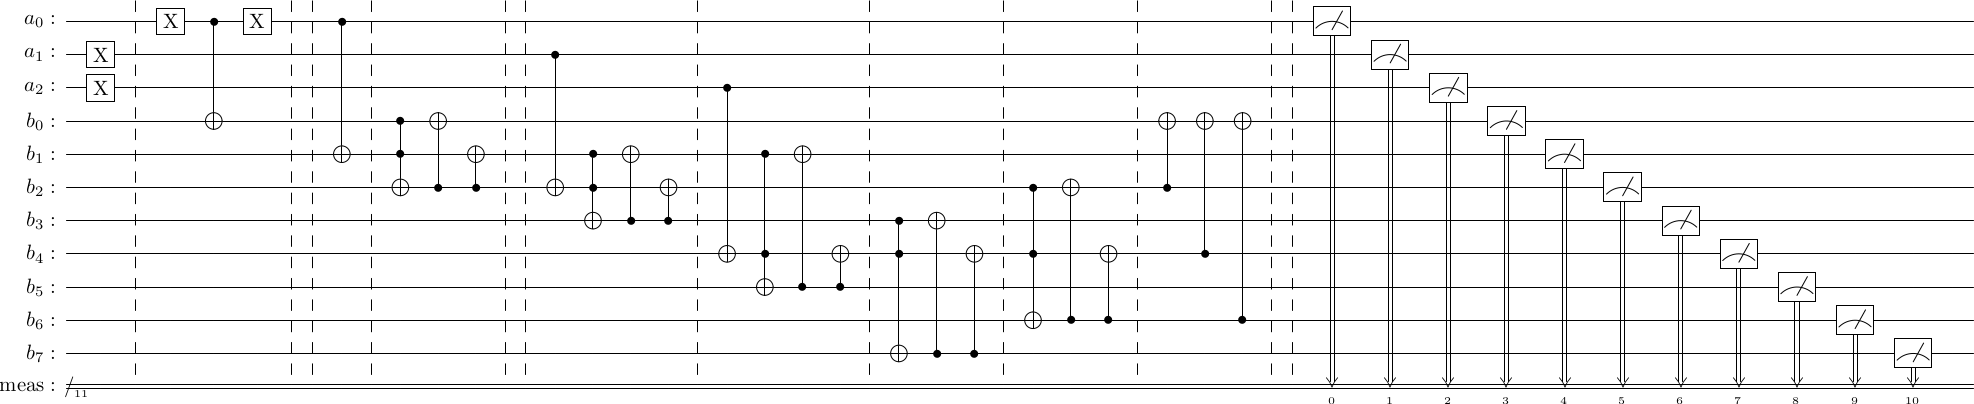

In [175]:
qc.x([a[1], a[2]])
qc.barrier()
qc.x(a[0])
qc.cx(a[0],b[0])
qc.x(a[0])
qc.barrier()

qc.barrier()
qc.cx(a[0],b[1])
# qc.cx(a[0],b[0])
qc.barrier()
qc.ccx(b[0], b[1], b[2])
qc.cx(b[2], b[0])
qc.cx(b[2], b[1])
qc.barrier()

qc.barrier()
qc.cx(a[1],b[2])
qc.ccx(b[1],b[2],b[3])
qc.cx(b[3],b[1])
qc.cx(b[3],b[2])
qc.barrier()
qc.cx(a[2],b[4])
qc.ccx(b[4], b[1], b[5])
qc.cx(b[5], b[1])
qc.cx(b[5], b[4])

qc.barrier()
qc.ccx(b[3], b[4], b[7])
qc.cx(b[7], b[3])
qc.cx(b[7], b[4])

qc.barrier()
qc.ccx(b[2], b[4], b[6])
qc.cx(b[6], b[2])
qc.cx(b[6], b[4])

qc.barrier()
qc.cx(b[2], b[0])
qc.cx(b[4], b[0])
qc.cx(b[6], b[0])

qc.barrier()
qc.measure_all(b)
qc.draw("latex")

{'01000000110': 1000}


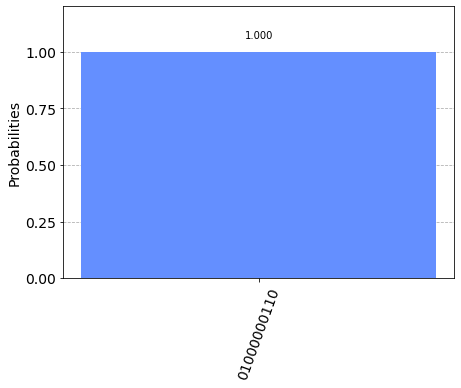

In [176]:
num_shots = 1000 #Setting the number of times to repeat measurement
backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend, shots=num_shots)
#Get results of program
job_stats = job.result().get_counts()
print(job_stats)

# import basic plot tools
from qiskit.visualization import plot_histogram
plot_histogram(job_stats)

In [194]:
qc = QuantumCircuit()
a = QuantumRegister(3, "a")
b = QuantumRegister(8, "b")
qc.add_register(a)
qc.add_register(b)

In [195]:
def bitwise_or_one(qc, a, b, c):
    qc.ccx(a, b, c)
    qc.cx(a, c)
    qc.cx(b, c)

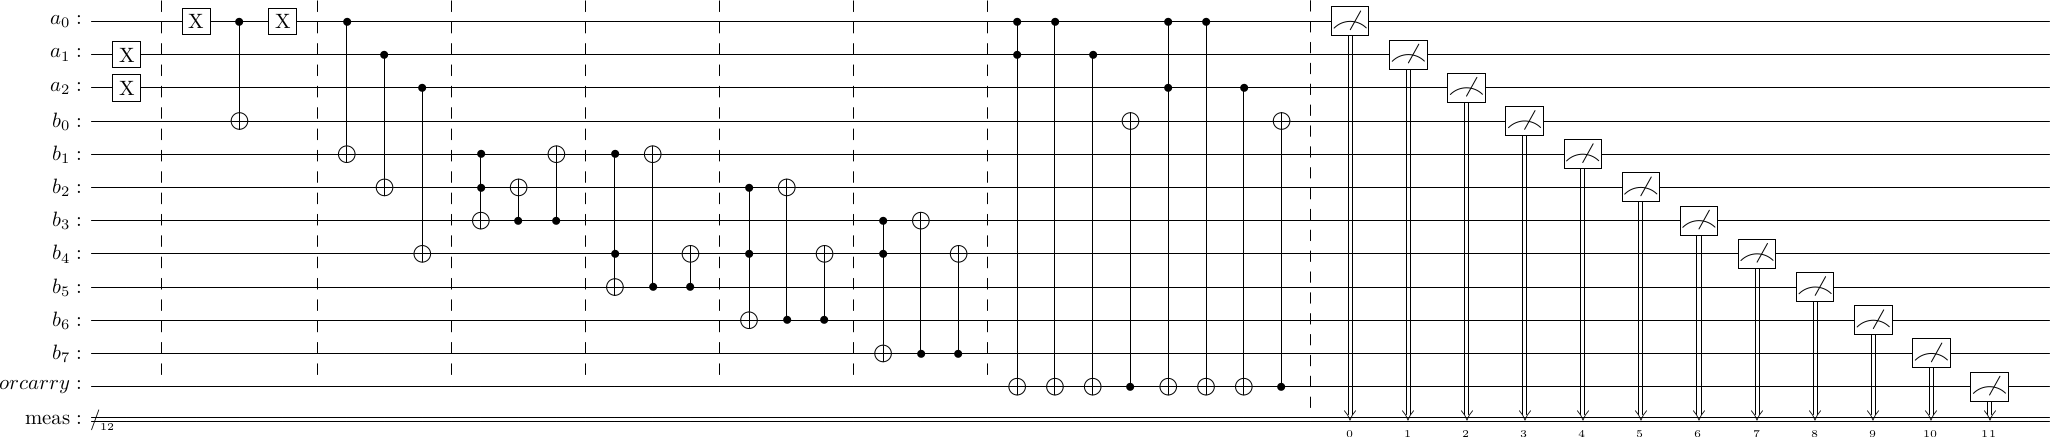

In [196]:
from QArithmetic import bitwise_or
qc.x([a[1], a[2]])
qc.barrier()
qc.x(a[0])
qc.cx(a[0],b[0])
qc.x(a[0])

qc.barrier()
qc.cx(a[0],b[1])
qc.cx(a[1],b[2])
qc.cx(a[2],b[4])

qc.barrier()
qc.ccx(b[1],b[2],b[3])
qc.cx(b[3],b[2])
qc.cx(b[3],b[1])

qc.barrier()
qc.ccx(b[1],b[4],b[5])
qc.cx(b[5],b[1])
qc.cx(b[5],b[4])


qc.barrier()
qc.ccx(b[2],b[4],b[6])
qc.cx(b[6],b[2])
qc.cx(b[6],b[4])

qc.barrier()
qc.ccx(b[3],b[4],b[7])
qc.cx(b[7],b[3])
qc.cx(b[7],b[4])
qc.barrier()
c = QuantumRegister(1, "or_carry")
qc.add_register(c)
bitwise_or_one(qc, a[0], a[1], c[0])
qc.cx(c[0], b[0])
bitwise_or_one(qc, a[0], a[2], c[0])
qc.cx(c[0], b[0])

# qc.cx(a[0],b[0])
qc.measure_all(b)
qc.draw("latex")

In [198]:
num_shots = 100 #Setting the number of times to repeat measurement
backend = Aer.get_backend("qasm_simulator")
job = execute(qc, backend, shots=num_shots)
#Get results of program
job_stats = job.result().get_counts()
print(job_stats)

# import basic plot tools
from qiskit.visualization import plot_histogram

plot_histogram(job_stats)

{'001000000110': 100}


NameError: name 'plt' is not defined

In [204]:
from QArithmetic import mult

# Registers and circuit.
a = QuantumRegister(2)
b = QuantumRegister(1)
m = QuantumRegister(3)
cm = ClassicalRegister(4)
qc = QuantumCircuit(a, b, m, cm)

# Numbers to multiply.
qc.x(a[1]) # a = 10 = 2
qc.x(b[0]) # b = 11 = 3

# Multiply the numbers, so |a>|b>|m=0> to |a>|b>|a*b>.
mult(qc, a, b, m, 2)

# Measure the result.
qc.measure(m, cm)

# Simulate the circuit.
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim)
result_sim = job_sim.result()

print(result_sim.get_counts(qc))

IndexError: list index out of range